In [12]:
# Esse arquivo faz o preprocessamento dos dados crus criados no arquivo "create_epoch"

import matplotlib
import mne

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = [11., 8.]

e = '1'
trial = 3

In [13]:
# Carrega o epoch sem filtros
epochs = mne.read_epochs('files/unfiltered_epo.fif')

Reading files/unfiltered_epo.fif ...
    Found the data of interest:
        t =       0.00 ...    4816.00 ms
        0 CTF compensation matrices available
125 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated


<EpochsFIF  |   125 events (all good), 0 - 4.816 sec, baseline off, ~18.6 MB, data loaded,
 '1': 25
 '2': 25
 '3': 30
 '4': 25
 '5': 20>

    Using multitaper spectrum estimation with 7 DPSS windows


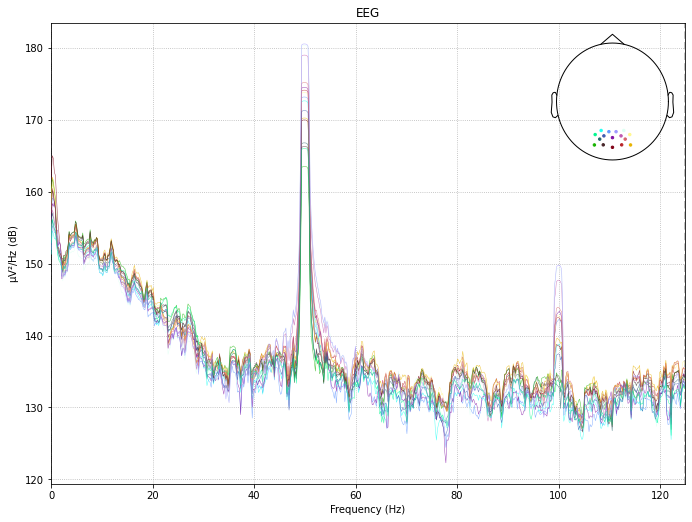

In [15]:
# Dados sem nenhum filtro, é possível observar o pico próximo a frequencia 50hz causado pela rede eletrica
epochs[e][trial].plot_psd()
print('')

Setting up band-pass filter from 4 - 14 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 4.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 3.00 Hz)
- Upper passband edge: 14.00 Hz
- Upper transition bandwidth: 3.50 Hz (-6 dB cutoff frequency: 15.75 Hz)
- Filter length: 413 samples (1.652 sec)

    Using multitaper spectrum estimation with 7 DPSS windows


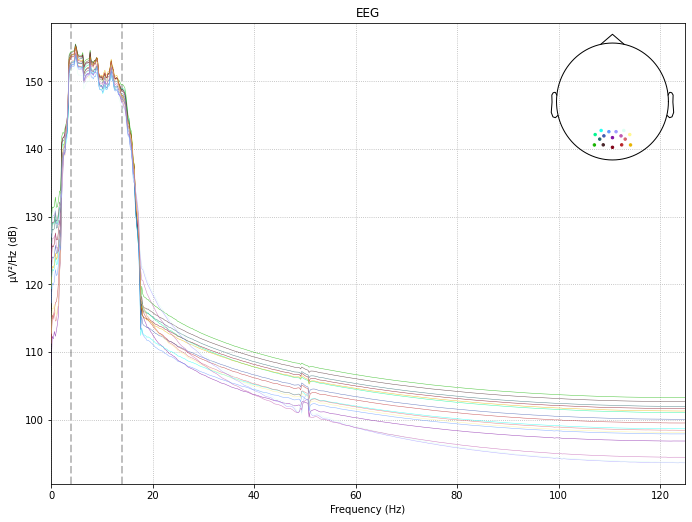

In [16]:
#Remove frenquencias abaixo de 4hz e acima de 14hz
epochs.filter(l_freq=4.0, h_freq=14.0)
epochs[e][trial].plot_psd()
print('')

    Using multitaper spectrum estimation with 7 DPSS windows


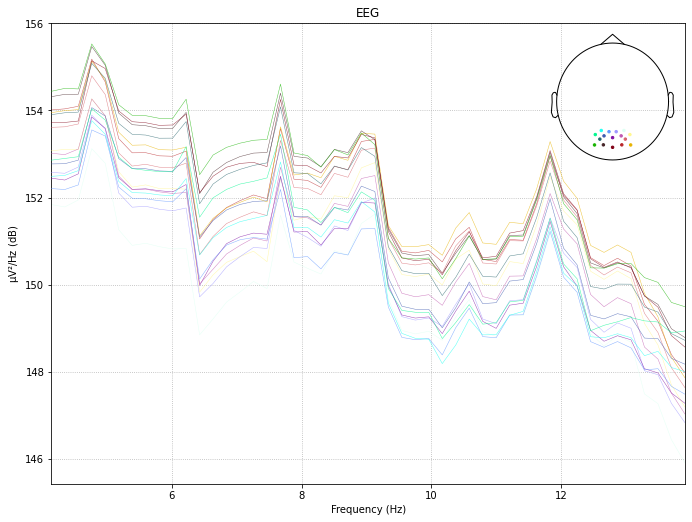

In [21]:
# Grafico apenas das frequencias de interesse (de 4hz até 14hz)
epochs[e][trial].plot_psd(fmin=4.0, fmax=14.0)
print('')

In [42]:
epo_ref = mne.set_eeg_reference(epochs, ref_channels=['E137'])

EEG channel type selected for re-referencing
Applying a custom EEG reference.
